In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Ayush"))

# Any results you write to the current directory are saved as output.


['.cache', '.conda', '.condarc', '.config', '.dbus-keyrings', '.ffbinaries-cache', '.gnome2', '.gnuradio', '.idlerc', '.ipynb_checkpoints', '.ipython', '.julia', '.jupyter', '.keras', '.matplotlib', '.python_history', '3D Objects', 'all_banks.pickle', 'anaconda3', 'ansel', 'AppData', 'Application Data', 'Assignment1.ipynb', 'Assignment_1.ipynb', 'Autodesk', 'Contacts', 'Cookies', 'coursera-test', 'Creative Cloud Files', 'Desktop', 'Documents', 'Downloads', 'DS303_Assignment1.ipynb', 'EDA_of_stock_prices.ipynb', 'EE325-Assignment5-Question9-Agorithm1 (1).ipynb', 'Favorites', 'Group12_Assignment1', 'hw1a.txt', 'hw1c1.txt', 'hw1c2.txt', 'IITB-Timetable-generator-main', 'ilyUkBmU4hH', 'IN914.txt', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'mountain_car.py', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{5b0bdf77-67c9-11ec-b792-cb00f96202b7}.TM.blf', 'NTUSER.DAT{5b0bdf77-67c9-11ec-b792-cb00f96202b7}.TMCon

In [2]:
!pip install pandas-datareader


In this data analysis, I will focus on exploratory data analysis of stock prices.

Keep in mind, this project is just meant to practice data visualization and pandas skills, It is not meant to be a robust financial analysis or be taken as financial advice.

# Get the Data

In [3]:

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo




In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime.now()




Lets go ahead with our exploratory data analysis. 

In [5]:
df = pd.read_pickle('../Ayush/all_banks.pickle')


Lets check what is there in this data set. 

In [6]:
df.tail()


Bank Ticker    BAC                                       C                    \
Stock Info   Close   High    Low   Open      Volume  Close     High      Low   
Date                                                                           
2018-04-24   30.19  30.86  30.00  30.46  81486781.0  69.12  70.6200  68.4001   
2018-04-25   30.14  30.34  29.80  30.09  65893478.0  69.36  69.7650  68.0500   
2018-04-26   30.07  30.28  29.99  30.04  45936713.0  69.18  69.5900  68.9000   
2018-04-27   30.15  30.21  29.97  29.99  47411234.0  68.99  69.4377  68.7400   
2018-04-30   29.92  30.43  29.92  30.27  55153947.0  68.27  69.5900  68.2500   

Bank Ticker                     ...     MS                                     \
Stock Info    Open      Volume  ...  Close    High     Low   Open      Volume   
Date                            ...                                             
2018-04-24   69.76  16233650.0  ...  53.07  54.615  52.435  53.96  10742663.0   
2018-04-25   68.77  16059671.0  ...  52.04  52.870  51.820  52.85  12622985.0   
2018-04-26   69.11  13829682.0  ...  52.20  52.600  51.670  52.01  14668929.0   
2018-04-27   69.00  10420057.0  ...  51.86  52.510  51.780  51.84   7784472.0   
2018-04-30   69.20  12237893.0  ...  51.62  52.500  51.580  52.18   8209733.0   

Bank Ticker    WFC                                     
Stock Info   Close    High     Low   Open      Volume  
Date                                                   
2018-04-24   52.51  53.745  52.180  52.95  23052062.0  
2018-04-25   53.11  53.490  51.925  52.44  20978459.0  
2018-04-26   52.44  53.110  52.255  52.99  17025831.0  
2018-04-27   52.36  52.940  52.205  52.28  12304308.0  
2018-04-30   51.96  53.050  51.960  52.56  17050544.0  

[5 rows x 30 columns]

This data contain daily status of each bank mentioned above. 

Now lets find out the max Close price for each bank's stock throughout the time period?

In [7]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.9000
C      564.1000
GS     273.3800
JPM    118.7700
MS      74.1294
WFC     65.9300
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874


Create a pairplot using seaborn of the returns dataframe.

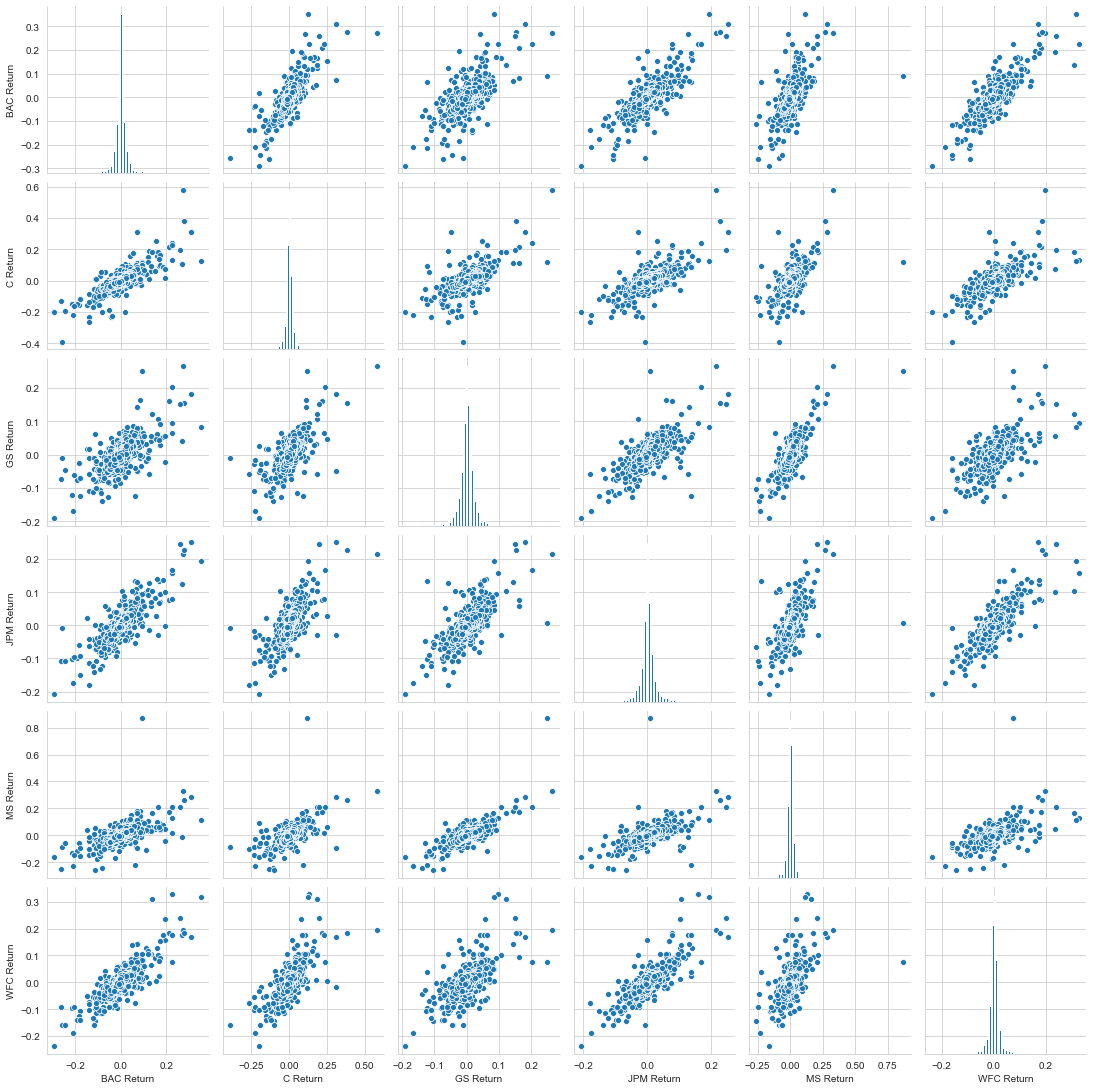

In [31]:
import seaborn as sns
sns.pairplot(returns[1:], diag_kws = { 'bins':100})

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.



In [11]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [12]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? 

Which would you classify as the riskiest for the year 2018?

In [13]:
returns.std()

BAC Return    0.033231
C Return      0.034890
GS Return     0.023393
JPM Return    0.025190
MS Return     0.034188
WFC Return    0.027405
dtype: float64

Create a distplot using seaborn of returns for Morgan Stanley in last one year.

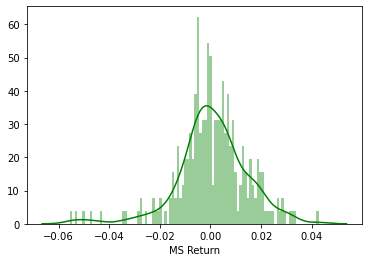

In [14]:
sns.distplot(returns.loc['2017-05-01':'2018-04-30']['MS Return'],color='green',bins=100)

Create a distplot using seaborn of the 2008 returns for CitiGroup

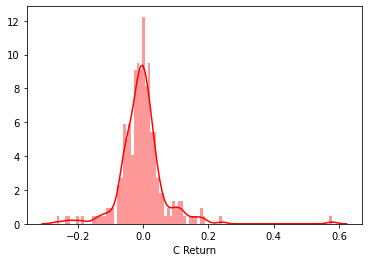

In [15]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

**More visualization**

In [17]:
!pip install plotly

In [19]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=458db0c8832e0998c9611d8c58f9d315688565ee4850344085216ee3aa65c29f
  Stored in directory: c:\users\ayush\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports

import plotly
import cufflinks as cf
cf.go_offline()

Create a line plot showing Close price for each bank for the entire index of time. 

Observe citi bank line and time when it has gone down. 

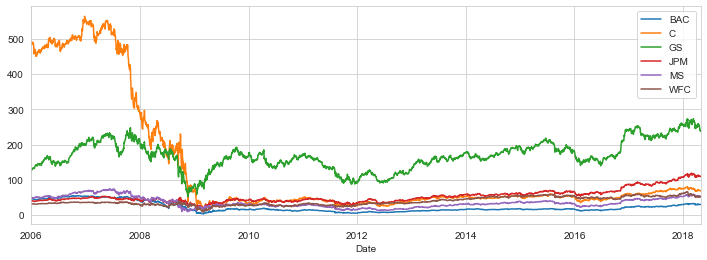

In [21]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

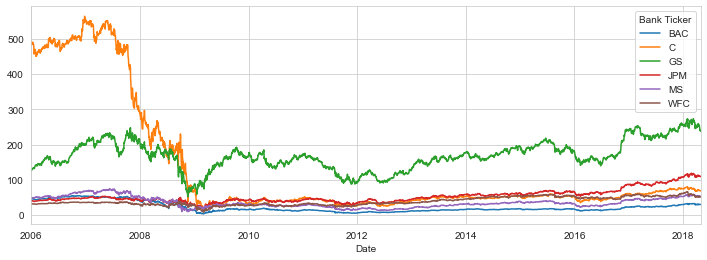

In [22]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

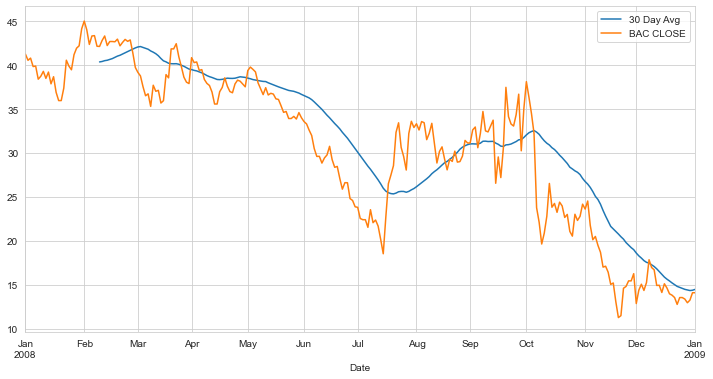

In [23]:
plt.figure(figsize=(12,6))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Plot the rolling 30 day average against the Close Price for Citi bank stock for the year 2008**

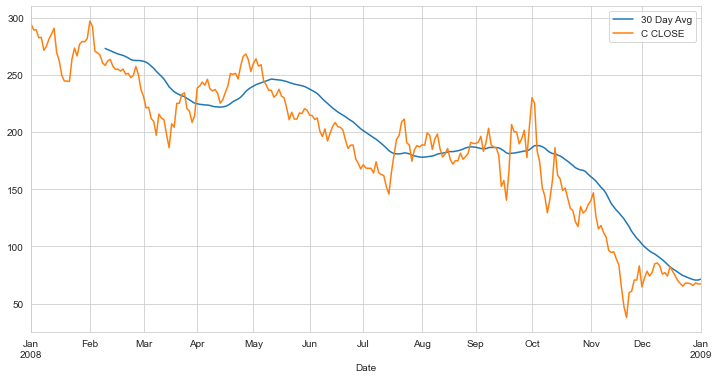

In [24]:
plt.figure(figsize=(12,6))
df['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C CLOSE')
plt.legend()

In [25]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

**Seaborn heatmap of the correlation between the stocks Close Price.**

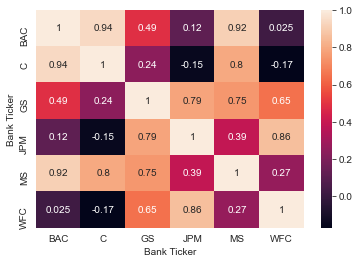

In [26]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Seaborn's clustermap to cluster the correlations together:**

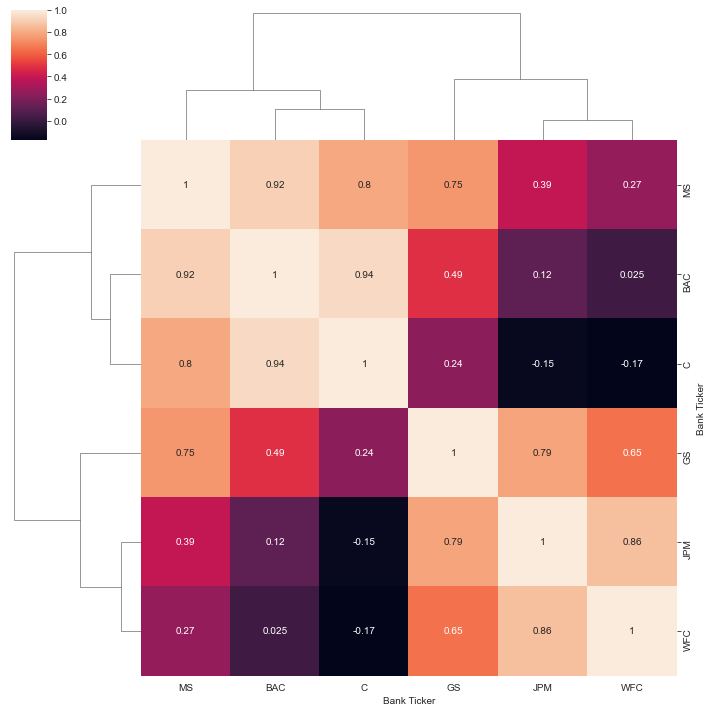

In [27]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Candle plot of Bank of America's stock from Jan 1st 2017  to April 30th 2018.**

In [28]:
df['BAC'][['Open', 'High', 'Low', 'Close']].loc['2017-01-01':'2018-04-30'].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2017.**

In [29]:
df['MS']['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

 **Create a Bollinger Band Plot for Citi bank for the year 2017.**

In [30]:
df['C']['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='boll')

From above plots its clear that the trend shows the reason for behavior in Nov 2008 and May 2011. It also shows the current trend of citibank and it looks pretty good.